In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re 
from wordcloud import WordCloud

In [9]:
from google.colab import files
files.upload()

Saving Fake_News.xlsx to Fake_News.xlsx


In [53]:
Fake_df=pd.read_excel('/content/Fake_News.xlsx')
Real_df=pd.read_excel('/content/Real_News.xlsx')

In [54]:
Fake_df.tail()

,Title,News_text,Subject
23692,CLOAKED ORDER: Whoâ€™s Really Behind â€˜New Au...,"21st Century Wire says Earlier this week, the ...",Middle-east
23693,Bill Maher Gets His Swagger On Over Liberal C...,Bill Maher finished Friday s episode of Real T...,News
23694,WHOA! BLACK WOMAN FED UP WITH BLACK RACISTS NA...,WOW This woman absolutely nails it!,politics
23695,"State Dept. Releases 7,000 Clinton E-mails But...","The State Department released 7,000 Clinton e-...",politics
23696,"Muslim Afghani Rapes 2-YEAR-OLD, Gets 2 Years ...",A 22-year-old Muslim man from Afghanistan prou...,PoliticalFact


In [55]:
Real_df.head()

,Title,News_text,Subject
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews


In [56]:
print(Real_df.shape)
print(Fake_df.shape)

(21755, 3)
(23697, 3)


In [57]:
Real_df.nunique()

Title        21158
News_text    21520
Subject          4
dtype: int64

In [58]:
Fake_df.nunique()

Title        18124
News_text    17676
Subject          7
dtype: int64

In [59]:
Real_df.isnull().sum()

Title        0
News_text    0
Subject      0
dtype: int64

In [60]:
Fake_df.isnull().sum()

Title        0
News_text    0
Subject      0
dtype: int64

In [61]:
def cleaning(Inpdata):
    cleanedArticle1=re.sub(r'[?|$|(),"".@#=><|!]Â&*/',r' ',Inpdata)
    cleanedArticle2=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle1)
    cleanedArticle3=re.sub(r'\b\w{1,1}\b',r' ',cleanedArticle2)
    cleanedArticle4=re.sub(r'[^a-z A-Z]',r' ',cleanedArticle3)
    cleanedArticle5=cleanedArticle4.lower()
    cleanedArticle6=re.sub(r' +',r' ',cleanedArticle5)
    return(cleanedArticle6)

In [62]:
Fake_df['title_new']=Fake_df['Title'].apply(cleaning)
Fake_df['Subject_new']=Fake_df['Subject'].apply(cleaning)

In [63]:
Real_df['title_new']=Real_df['Title'].apply(cleaning)
Real_df['Subject_new']=Real_df['Subject'].apply(cleaning)

In [64]:
Fake_df['News_text_new']=Fake_df['News_text'].apply(cleaning)

In [65]:
Fake_df=Fake_df.drop(labels=['Title','Subject'], axis=1)
Real_df=Real_df.drop(labels=['Title','Subject'], axis=1)
Fake_df=Fake_df.drop(labels=['News_text'], axis=1)

In [66]:
def striping_text(inpdata):
  ext="(Reuters) -"
  inp = inpdata[inpdata.find(ext) + len(ext):]
  return(inp)

In [67]:
def striping_reuters(inpdata):
  ext="(Reuters)"
  inp = inpdata[:inpdata.find(ext) + len(ext)]
  return(inp)

In [68]:
Real_df['news_text']=Real_df['News_text'].apply(striping_text)

In [69]:
Real_df['news_text_clean']=Real_df['news_text'].apply(cleaning)

In [70]:
Real_df['Reuters_text']=Real_df['News_text'].apply(striping_reuters)

In [72]:
Real_df=Real_df.drop(labels=['News_text'], axis=1)
Real_df=Real_df.drop(labels=['news_text'], axis=1)

In [ ]:
###################################################################################

In [73]:
Real_df.shape ,Fake_df.shape

((21755, 4), (23697, 3))

In [74]:
Real_df.columns

Index(['title_new', 'Subject_new', 'news_text_clean', 'Reuters_text'], dtype='object')

In [75]:
Fake_df.columns

Index(['title_new', 'Subject_new', 'News_text_new'], dtype='object')

In [76]:
import plotly.express as px
fig = px.histogram(Real_df, x='Subject_new', template='plotly_white', title='News as per Subjects of Real News',width=850, height=350)
fig.show()

In [77]:
fig = px.pie(Real_df[:40],names='Reuters_text', template='plotly_white', title='Volume of News as per Top city wise Reuters', width=1950, height=550)
fig.show()

In [78]:
fig = px.histogram(Fake_df, x='Subject_new', template='plotly_white', title='News as per Subjects of Fake News',width=850, height=350)
fig.show()

In [79]:
import nltk
from nltk.corpus import stopwords
from stop_words import get_stop_words
nltk.download('stopwords')
stopwords = stopwords.words('english')
en_stop = get_stop_words('en')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
corp_real=Real_df['news_text_clean'].str.split()
corp_fake=Fake_df['News_text_new'].str.split()

In [81]:
word_real=[]
for i in range(len(corp_real)):
  for w in corp_real[i]:
     if w not in en_stop:
       word_real.append(w)

In [82]:
freq_real=nltk.FreqDist(word_real)
real_freq=pd.DataFrame({"Word": list(freq_real.keys()),"Frequency": list(freq_real.values())})
real_freq=real_freq[(real_freq['Frequency']<=6000) & (real_freq['Frequency']>=600)]

In [83]:
fig = px.bar(real_freq[:200], x='Word', template='plotly_white', title='Top frequent words in Real News',width=850, height=350)
fig.show()

In [84]:
word_fake=[]
for i in range(len(corp_fake)):
  for w in corp_fake[i]:
     if w not in en_stop:
       word_fake.append(w)

In [85]:
freq_fake=nltk.FreqDist(word_fake)
fake_freq=pd.DataFrame({"Word": list(freq_fake.keys()),"Frequency": list(freq_fake.values())})
fake_freq=fake_freq[(fake_freq['Frequency']<=6000) & (fake_freq['Frequency']>=600)]

In [86]:
fig = px.funnel(fake_freq[:20], x='Word', template='plotly_white', title='frequent words in Fake News',width=850, height=350)
fig.show()

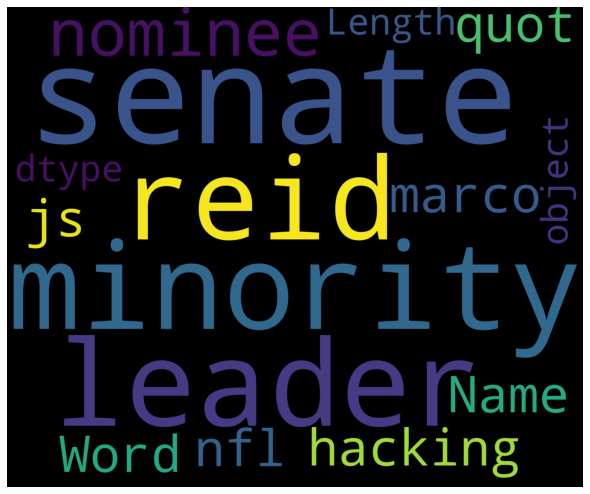

Text(0.5, 0.98, 'Frequent Fake words')

<Figure size 432x288 with 0 Axes>

In [87]:
wordcloud = WordCloud(width = 1800, height = 1500, background_color ='black',min_font_size = 10,stopwords=en_stop).generate(str(fake_freq['Word']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
plt.suptitle('Frequent Fake words',size=125,fontweight=135) 


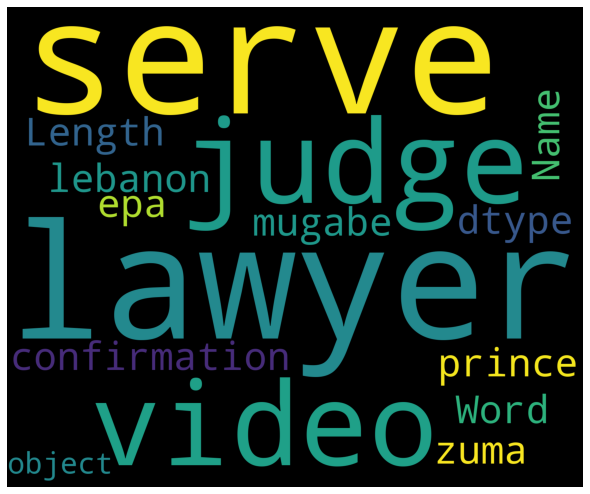

Text(0.5, 0.98, 'Frequent Real words')

<Figure size 432x288 with 0 Axes>

In [88]:
wordcloud = WordCloud(width = 1800, height = 1500, background_color ='black',min_font_size = 10).generate(str(real_freq['Word']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
plt.suptitle('Frequent Real words',size=125,fontweight=135)  

In [ ]:
##### Creating Phrases

In [89]:
Real_df.isnull().sum()

title_new          0
Subject_new        0
news_text_clean    0
Reuters_text       0
dtype: int64

In [90]:
Fake_df.isnull().sum()

title_new        0
Subject_new      0
News_text_new    0
dtype: int64

In [91]:
from nltk.stem import WordNetLemmatizer
ps=WordNetLemmatizer()

In [92]:
real_subject=Real_df['Subject_new'].unique()
fake_subject=Fake_df['Subject_new'].unique()

In [93]:
real_subject_list=[]
fake_subject_list=[]
for i in real_subject:
    real_subject_list.append(i)
for j in fake_subject:
    fake_subject_list.append(j)

In [97]:
Real_df=Real_df.dropna()
Fake_df=Fake_df.dropna()

In [98]:
text_political=[]
text_worldnews=[]
text_news=[]
text_politicalfact=[]
for i in range(0,len(Real_df)):
     label=Real_df['Subject_new'][i]
     if label =='politicsnews':
         text_political.append(Real_df['news_text_clean'][i])
     elif label =='worldnews':
         text_worldnews.append(Real_df['news_text_clean'][i])
     elif label =='news':
         text_news.append(Real_df['news_text_clean'][i])
     else:
         text_politicalfact.append(Real_df['news_text_clean'][i])          

In [99]:
text_political=[ps.lemmatize(w) for w in text_political[:500] if w not in stopwords]
text_worldnews=[ps.lemmatize(j) for j in text_worldnews[:500] if j not in stopwords]
text_news=[ps.lemmatize(i) for i in text_news[:500] if i not in stopwords]
text_politicalfact=[ps.lemmatize(k) for k in text_politicalfact[:500] if k not in stopwords]

components=[text_political,text_worldnews,text_news,text_politicalfact]

Text(0.5, 0.98, 'Wordcloud of Real News with different Subjects')

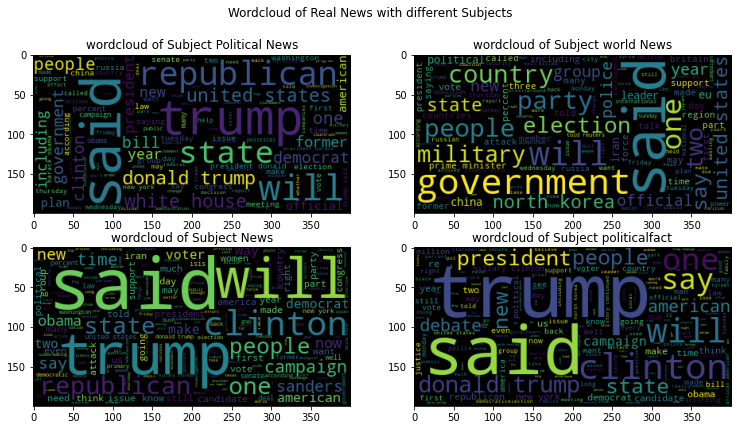

In [111]:
fig, ax = plt.subplots(2,2, figsize=(12.5,6.5))
ax[0][0].imshow(WordCloud().generate(str(text_political)))
ax[0][0].title.set_text('wordcloud of Subject Political News')
ax[0][1].imshow(WordCloud().generate(str(text_worldnews)))
ax[0][1].title.set_text('wordcloud of Subject world News')
ax[1][0].imshow(WordCloud().generate(str(text_news)))
ax[1][0].title.set_text('wordcloud of Subject News')
ax[1][1].imshow(WordCloud().generate(str(text_politicalfact)))
ax[1][1].title.set_text('wordcloud of Subject politicalfact')
fig.suptitle("Wordcloud of Real News with different Subjects")


In [113]:
text_news=[]
text_leftnews=[]
text_politics=[]
text_govtnews=[]
text_middleeast=[]
text_usnews=[]
text_politicalfact=[]
for i in range(0,len(Fake_df)):
     label=Fake_df['Subject_new'][i]
     if label =='news':
          text_news.append(Fake_df['News_text_new'][i])
     elif label =='left news':
          text_leftnews.append(Fake_df['News_text_new'][i])
     elif label =='politics':
          text_politics.append(Fake_df['News_text_new'][i])
     elif label =='government news':
          text_govtnews.append(Fake_df['News_text_new'][i])
     elif label =='middle east':
          text_middleeast.append(Fake_df['News_text_new'][i])
     elif label =='us news':
          text_usnews.append(Fake_df['News_text_new'][i])
     else:
          text_politicalfact.append(Fake_df['News_text_new'][i])    

In [117]:
text_news=[ps.lemmatize(w) for w in text_news[:500] if w not in stopwords]
text_leftnews=[ps.lemmatize(w) for w in text_leftnews[:500] if w not in stopwords]
text_politics=[ps.lemmatize(w) for w in text_politics[:500] if w not in stopwords]
text_govtnews=[ps.lemmatize(w) for w in text_govtnews[:500] if w not in stopwords]
text_middleeast=[ps.lemmatize(w) for w in text_middleeast[:500] if w not in stopwords]
text_usnews=[ps.lemmatize(w) for w in text_usnews[:500] if w not in stopwords]
text_politicalfact=[ps.lemmatize(w) for w in text_politicalfact[:500] if w not in stopwords]

Text(0.5, 0.98, 'Wordcloud of Fake News with different Subjects')

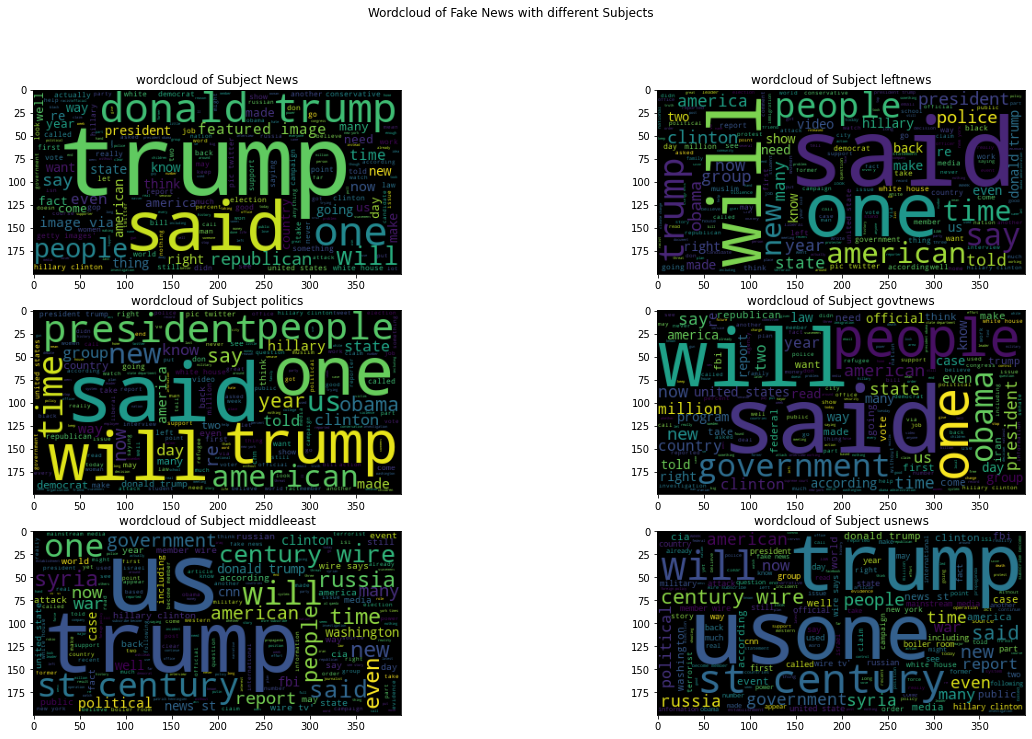

In [119]:
fig, ax = plt.subplots(3,2, figsize=(20.5,11.5))
ax[0][0].imshow(WordCloud().generate(str(text_news)))
ax[0][0].title.set_text('wordcloud of Subject News')
ax[0][1].imshow(WordCloud().generate(str(text_leftnews)))
ax[0][1].title.set_text('wordcloud of Subject leftnews')
ax[1][0].imshow(WordCloud().generate(str(text_politics)))
ax[1][0].title.set_text('wordcloud of Subject politics')
ax[1][1].imshow(WordCloud().generate(str(text_govtnews)))
ax[1][1].title.set_text('wordcloud of Subject govtnews')
ax[2][0].imshow(WordCloud().generate(str(text_middleeast)))
ax[2][0].title.set_text('wordcloud of Subject middleeast')
ax[2][1].imshow(WordCloud().generate(str(text_usnews)))
ax[2][1].title.set_text('wordcloud of Subject usnews')
fig.suptitle("Wordcloud of Fake News with different Subjects")

In [59]:
################## Spelling Checking of Real News ##################################################
from spellchecker import SpellChecker
spell = SpellChecker()
from textblob import TextBlob
from PIL import Image
from scipy.ndimage import gaussian_gradient_magnitude
import os
from wordcloud import WordCloud, ImageColorGenerator

In [60]:
misspelt_words =[]
spell = SpellChecker(language='en') 
for w in word_real:
    misspelled=spell.unknown([w])
    misspelt_words.append(misspelled)

In [61]:
misspell_words=str(misspelt_words)
misspell_words=re.sub(r'[^a-z A-Z]',r' ',misspell_words)
misspell_words=misspell_words.split()
misspell_real_list=[w for w in misspell_words if w not in['set']]

In [ ]:
###### coorected real news words ##########################

In [ ]:
real_correct_list=[]
for word in misspell_real_list:                                  
  real_correct_list.append(spell.correction(word))

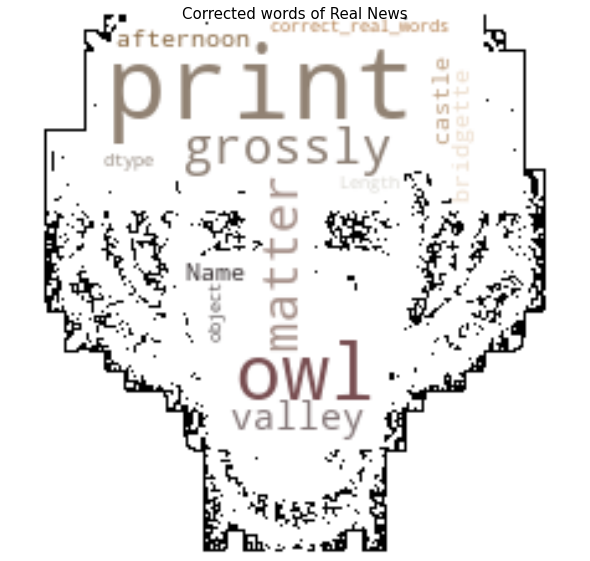

In [68]:
correct_real_df=pd.DataFrame(real_correct_list, columns=['correct_real_words'])
tiger = np.array(Image.open("img/tiger.jpg"))
wordcloud = WordCloud(width = 800, height = 500, background_color ='white',mask=tiger, mode='RGB',contour_width=1, max_words=2500).generate(str(correct_real_df['correct_real_words']))
image_colors = ImageColorGenerator(tiger)
wordcloud.recolor(color_func=image_colors)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.suptitle('Corrected words of Real News',size=15,fontweight=5)   
plt.show()


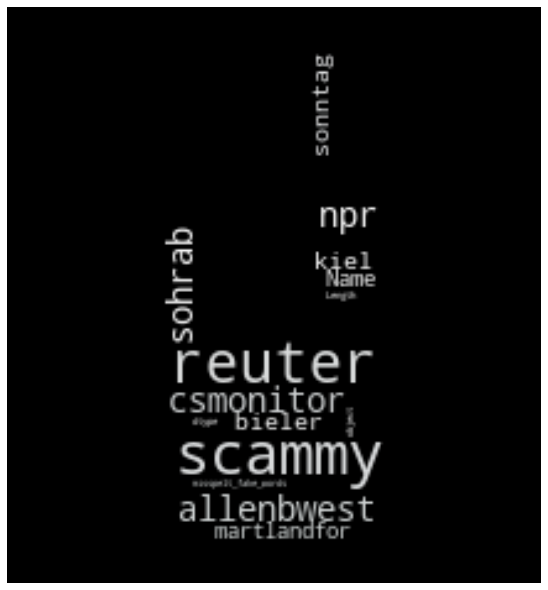

Text(0.5, 0.98, 'Misspelt words of fake News')

<Figure size 432x288 with 0 Axes>

In [73]:
################## Spelling Checking of Fake News ##################################################
misspelt_words =[]
spell = SpellChecker(language='en') 
for w in word_fake:
    misspelled=spell.unknown([w])
    misspelt_words.append(misspelled)
misspell_words=str(misspelt_words)
misspell_words=re.sub(r'[^a-z A-Z]',r' ',misspell_words)
misspell_words=misspell_words.split()
misspell_fake_list=[w for w in misspell_words if w not in['set']]
misspell_fake_list =list(dict.fromkeys(misspell_fake_list))
mis_fake_df=pd.DataFrame(misspell_fake_list, columns=['misspelt_fake_words'])
bottle = np.array(Image.open("img/bottle.jpg"))
wordcloud = WordCloud(width = 1800, height = 1500, background_color ='black',mask=bottle, mode='RGB', max_words=2500).generate(str(mis_fake_df['misspelt_fake_words']))
image_colors = ImageColorGenerator(bottle)
wordcloud.recolor(color_func=image_colors)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
plt.suptitle('Misspelt words of fake News',size=125,fontweight=135)  



In [ ]:
fake_correct_list=[]
for word in misspell_fake_list:                                  
  fake_correct_list.append(spell.correction(word))

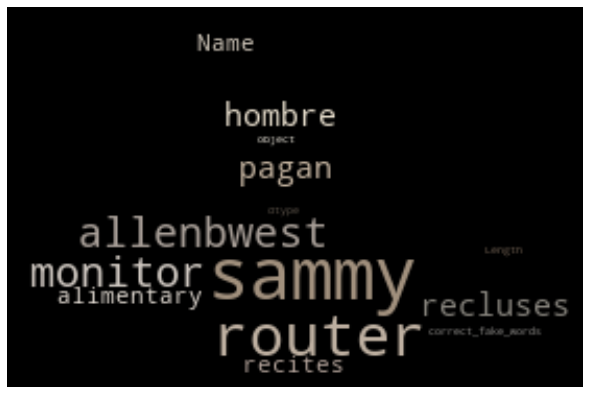

Text(0.5, 0.98, 'Corrected words of fake News')

<Figure size 432x288 with 0 Axes>

In [77]:
correct_fake_df=pd.DataFrame(fake_correct_list, columns=['correct_fake_words'])
snake= np.array(Image.open("img/snake.jpg"))
wordcloud = WordCloud(width = 1800, height = 1500, background_color ='black',mask=snake, mode='RGB',contour_width=1).generate(str(correct_fake_df['correct_fake_words']))
image_colors = ImageColorGenerator(snake)
wordcloud.recolor(color_func=image_colors)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
plt.suptitle('Corrected words of fake News',size=125,fontweight=135)  

In [ ]:
fake_top_50=fake_freq.nlargest(columns='Frequency',n=50)
real_top_50=real_freq.nlargest(columns='Frequency',n=50)

In [ ]:
fake_top_50=fake_top_50['Word'].to_list()
real_top_50=real_top_50['Word'].to_list()

In [ ]:
Real_phrases=[]
Real_text=word_real
for word in real_top_50:
    indx = Real_text.index(word)
    Real_phrases.append(" ".join(Real_text[indx-1:indx+2]))

In [ ]:
Real_phrases[:15]

['foreign policy adviser',
 'fight iran aligned',
 'republican leader mitch',
 'last month risks',
 'behalf three people',
 'former secretary state',
 'will make federal',
 'director general roberto',
 'decades public service',
 'summit next week',
 'stand nuclear crisis',
 'delegates take nomination',
 'left democrats fuming',
 'considering whether increase',
 'human rights lawyers']

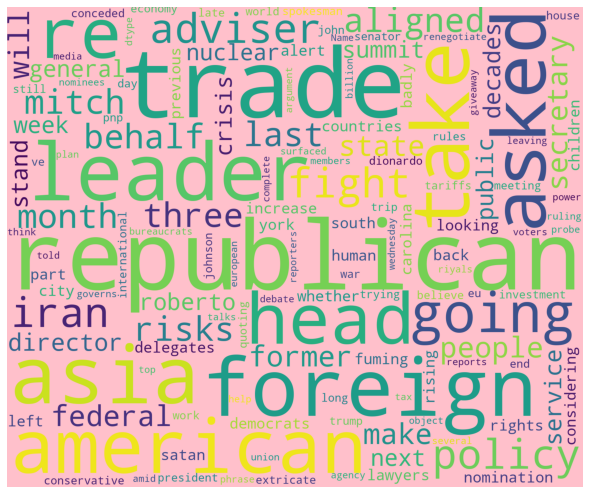

Text(0.5, 0.98, 'Some Pharses of Real News')

<Figure size 432x288 with 0 Axes>

In [ ]:
Real_phrases_df=pd.DataFrame(Real_phrases,columns=['phrase'])
wordcloud = WordCloud(width = 1800, height = 1500, background_color ='pink',min_font_size = 10,).generate(str(Real_phrases_df['phrase']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
plt.suptitle('Some Pharses of Real News',size=125,fontweight=135)  


In [ ]:
fake_phrases=[]
fake_text=word_fake
for word in fake_top_50:
    indx = fake_text.index(word)
    fake_phrases.append(" ".join(fake_text[indx-1:indx+2]))

In [ ]:
fake_phrases[:15]

['evidence support argument',
 'though still appears',
 '2016 presidential race',
 'spector vote us',
 'spill administration becomes',
 'matter fbi working',
 'raw story facebook',
 'department office indian',
 'national security reid',
 'jewish didn stop',
 'fact ve got',
 'news washington post',
 'isn left trump',
 'energy department office',
 'boehner good company']

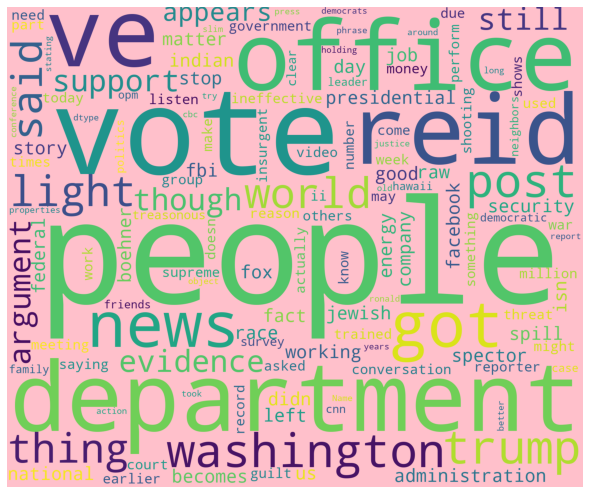

Text(0.5, 0.98, 'Some Pharses of Fake News')

<Figure size 432x288 with 0 Axes>

In [ ]:
fake_phrases_df=pd.DataFrame(fake_phrases,columns=['phrase'])
wordcloud = WordCloud(width = 1800, height = 1500, background_color ='pink',min_font_size = 10).generate(str(fake_phrases_df['phrase']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
plt.suptitle('Some Pharses of Fake News',size=125,fontweight=135)  

In [ ]:
########## UNIGRAM, BIGRAM AND Trigram ########################

In [ ]:
import nltk
from nltk.collocations import *
from collections import Counter

In [ ]:
bigram_real_token = nltk.ngrams(word_real,2)
trigram_real_token= nltk.ngrams(word_real,3)
quadragram_real_token=  nltk.ngrams(word_real,4)

In [ ]:
top=Counter(bigram_real_token)
bigram_df=pd.DataFrame(top.most_common(10))
bigram_df.columns=['common_words','count']

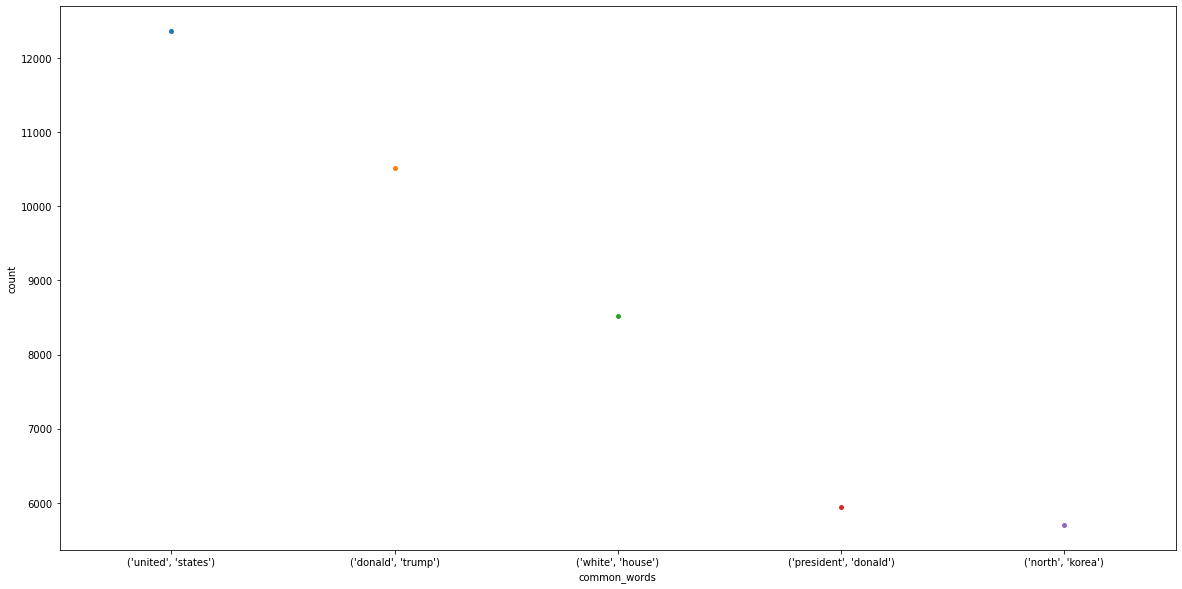

In [ ]:
figsize=(20,10)
fig, ax = plt.subplots(figsize=figsize)
sns.swarmplot(x = "common_words", y = "count", data = bigram_df[:5],orient='v',ax=ax)
plt.show()

In [ ]:
top=Counter(trigram_real_token)
trigram_df=pd.DataFrame(top.most_common(10))
trigram_df.columns=['common_words','count']

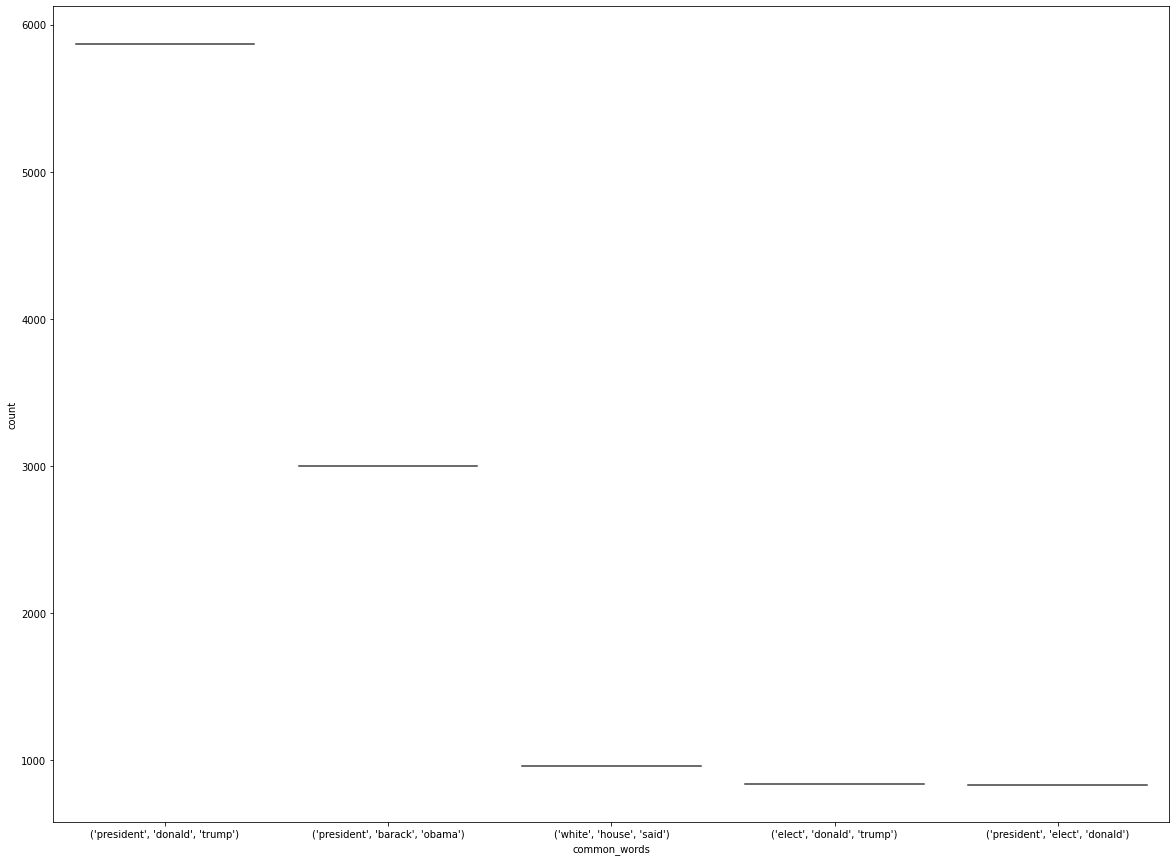

In [ ]:
figsize=(20,15)
fig, ax = plt.subplots(figsize=figsize)
sns.violinplot(x = "common_words", y = "count", data = trigram_df[:5],ax=ax)
plt.show()

In [ ]:
top=Counter(quadragram_real_token)
quadragram_df=pd.DataFrame(top.most_common(10))
quadragram_df.columns=['common_words','count']

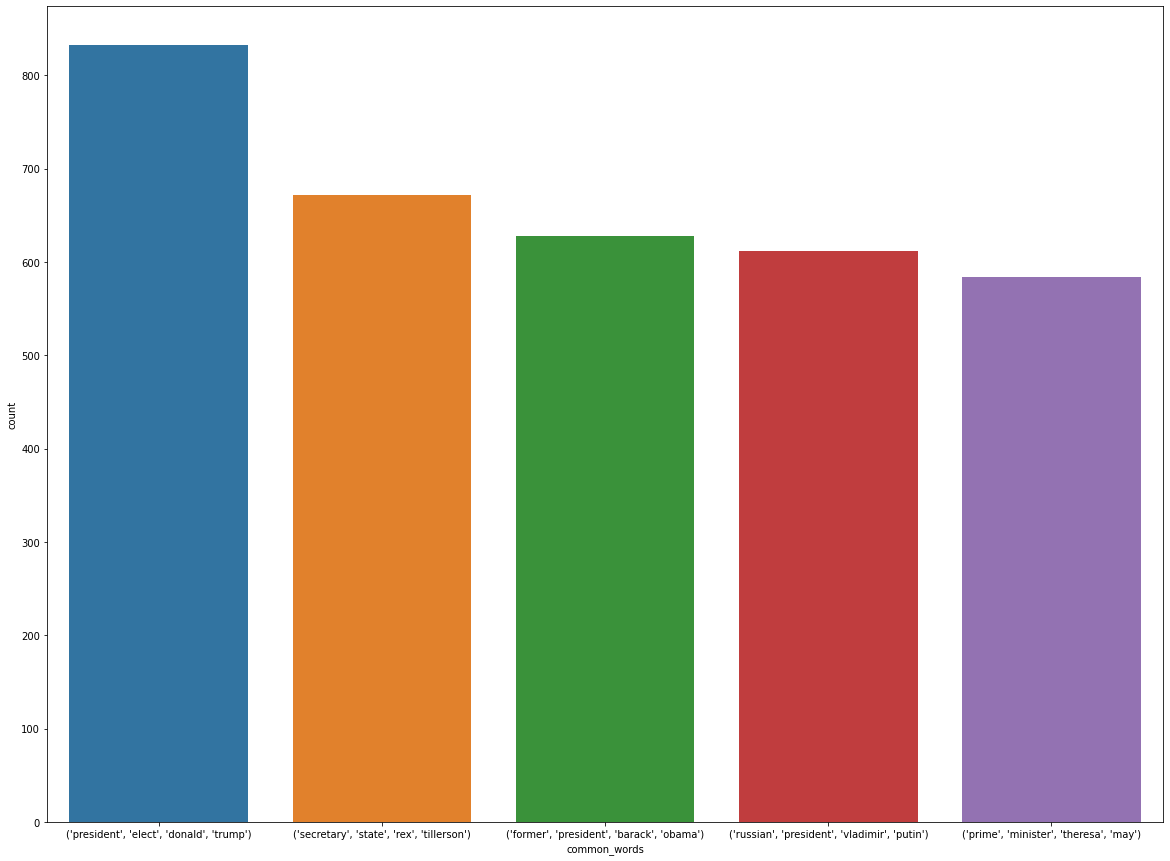

In [ ]:
figsize=(20,15)
fig, ax = plt.subplots(figsize=figsize)
sns.barplot(x = "common_words", y = "count", data = quadragram_df[:5],ax=ax)
plt.show()

In [ ]:
############# Lets find some simmilarity between Tittle & News Text #####################

In [ ]:
Real_df.columns , Fake_df.columns

(Index(['title_new', 'Subject_new', 'news_text_clean', 'Reuters_text'], dtype='object'),
 Index(['title_new', 'Subject_new', 'News_text_new'], dtype='object'))

In [ ]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [ ]:
for i in range(len(Real_df)):
  Real_df['score'][i]=get_jaccard_sim(Real_df['title_new'][i],Real_df['News_text_new'][i])

In [ ]:
Real_df=Real_df.sort_values(by=['score'],ascending=False)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec_df=Real_df[:5]
countvector1=CountVectorizer(analyzer='word',max_features=15,stop_words=en_stop)
countvector2=CountVectorizer(analyzer='word',max_features=15,stop_words=en_stop)
vec1=countvector1.fit_transform(vec_df['title_new'])
vec2=countvector2.fit_transform(vec_df['news_text_clean'])
vec1_df=pd.DataFrame(vec1.toarray(),columns=countvector1.get_feature_names())
vec2_df=pd.DataFrame(vec2.toarray(),columns=countvector2.get_feature_names())
merged_df = pd.concat([vec1_df, vec2_df])


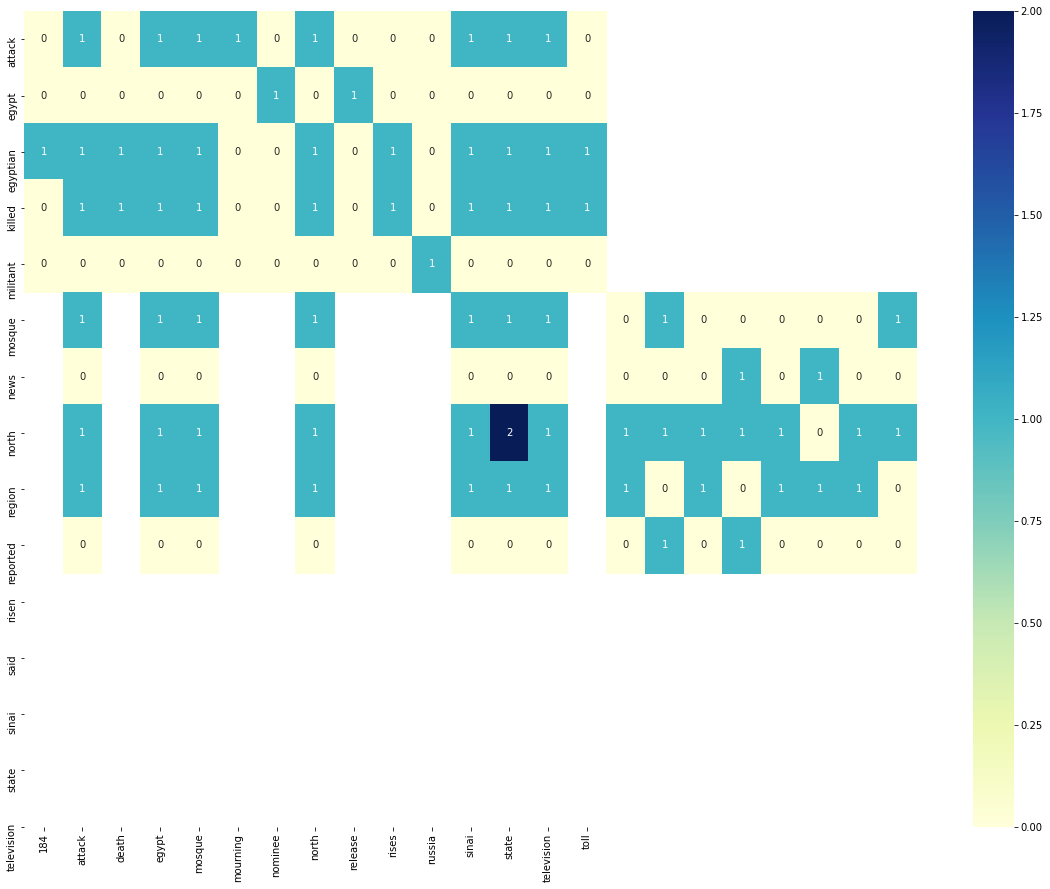

Text(0.5, 0.98, 'Some HeatMap of Simmilarities between Title & Real News')

<Figure size 432x288 with 0 Axes>

In [ ]:
figsize=(20,15)
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(merged_df,annot=True,  cmap='YlGnBu',ax=ax,xticklabels=countvector1.get_feature_names(), yticklabels=countvector2.get_feature_names(),)
plt.show()
plt.suptitle('Some HeatMap of Simmilarities between Title & Real News')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=en_stop)

def  cosine_sim(text1, text2):
     tfidf = vectorizer.fit_transform([text1, text2])
     return ((tfidf * tfidf.T).A)[0,1]

In [ ]:
for i in range(len(Fake_df)):
    Fake_df['score'][i]=cosine_sim(Fake_df['title_new'][i],Fake_df['News_text_new'][i])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec_df= Fake_df[:5]
countvector1=CountVectorizer(analyzer='word',max_features=15,stop_words=en_stop)
countvector2=CountVectorizer(analyzer='word',max_features=15,stop_words=en_stop)
vec1=countvector1.fit_transform(vec_df['title_new'])
vec2=countvector2.fit_transform(vec_df['News_text_new'])
vec1_df=pd.DataFrame(vec1.toarray(),columns=countvector1.get_feature_names())
vec2_df=pd.DataFrame(vec2.toarray(),columns=countvector2.get_feature_names())
merged_df = pd.concat([vec1_df, vec2_df])


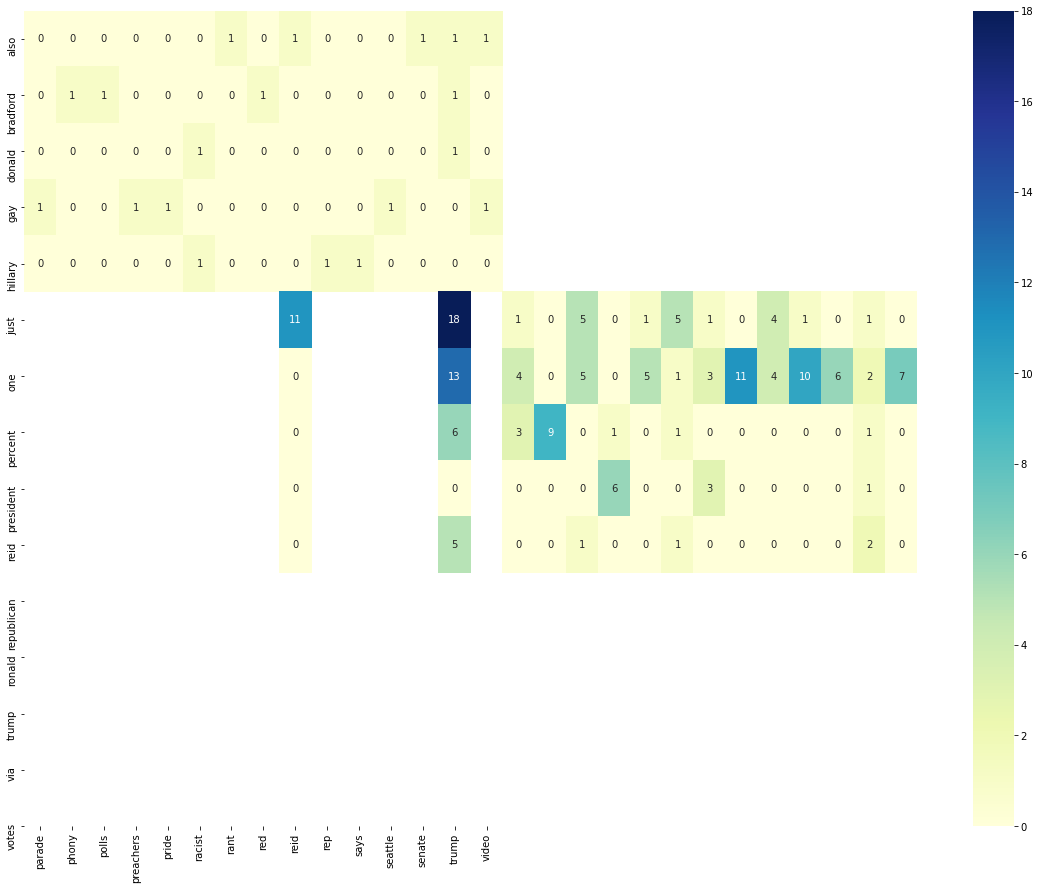

Text(0.5, 0.98, 'Some HeatMap of Simmilarities between Title & Fake News')

<Figure size 432x288 with 0 Axes>

In [ ]:
figsize=(20,15)
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(merged_df,annot=True,  cmap='YlGnBu',ax=ax,xticklabels=countvector1.get_feature_names(), yticklabels=countvector2.get_feature_names(),)
plt.show()
plt.suptitle('Some HeatMap of Simmilarities between Title & Fake News')